<a href="https://colab.research.google.com/github/balamurugan-palaniappan-CEP/AIML_CEP_2021/blob/main/CEP_Linear_Regression_High_Dimensions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$\Huge{\text{Linear Regression in High Dimensions}}$

In this session, we shall learn about linear regression when the predictor variables are high dimensional. 

Let us first consider a sample data, which will be useful for our study of linear regression in high dimensions. 

In [ ]:
#First, we import the required packages
import pandas as pd #the pandas library is useful for data processing 
import matplotlib.pyplot as plt #the matplotlib library is useful for plotting purposes

# The following python directive helps to plot the graph in the notebook directly
%matplotlib inline

Now let us consider some open source data sets available in the internet. 
The data set we will consider represents airline costs for different airline companies as a response variable dependent on multiple attributes. 


In [ ]:
#Let us explore the data and the description 

#Get the data from the web 
airline_costs_data = pd.read_csv('https://raw.githubusercontent.com/balamurugan-palaniappan-CEP/AIML_CEP_2021/main/data/airline_costs.txt', delim_whitespace=True, index_col=False, header=None)

#print the first few rows of the data 
airline_costs_data.head()


,0,1,2,3,4,5,6,7,8,9,10,11
0,AllAmerican,57,133,6.10,20200,116.3,0.96,0.400,2.400,21.13,3.21,17.92
1,American,270,216,6.93,56928,43.0,3.98,0.689,5.776,1436.53,165.22,1271.31
2,Bonanza,100,140,4.45,183,141.5,0.79,0.358,2.207,6.65,0.01,6.64
3,Braniff,176,182,6.60,11869,50.6,2.57,0.557,4.614,160.30,5.81,154.49
4,Capital,142,167,7.47,41097,51.0,2.68,0.510,5.255,195.02,6.06,188.96


In [ ]:
#if you wish to print the entire data, then use the following
airline_costs_data

,0,1,2,3,4,5,6,7,8,9,10,11
0,AllAmerican,57,133,6.10,20200,116.3,0.96,0.400,2.400,21.13,3.21,17.92
1,American,270,216,6.93,56928,43.0,3.98,0.689,5.776,1436.53,165.22,1271.31
2,Bonanza,100,140,4.45,183,141.5,0.79,0.358,2.207,6.65,0.01,6.64
3,Braniff,176,182,6.60,11869,50.6,2.57,0.557,4.614,160.30,5.81,154.49
4,Capital,142,167,7.47,41097,51.0,2.68,0.510,5.255,195.02,6.06,188.96
5,Central,51,134,4.67,1757,318.5,0.35,0.167,2.096,14.02,0.01,14.01
6,C&S,175,175,8.60,18000,59.2,2.17,0.558,3.889,114.16,3.11,111.05
7,Colonial,112,150,6.87,13500,77.0,1.68,0.505,3.327,35.34,0.79,34.55
8,Continental,131,179,6.50,3831,62.3,1.70,0.537,3.166,49.74,3.49,46.25
9,Delta,174,191,7.60,13119,45.3,2.74,0.598,4.582,174.32,3.87,170.45


What do the numbers in the above data mean? Let us understand the data by seeing its description. 

In [ ]:
import urllib.request  #this package is useful for accessing text files over internet 
drug_vs_mathscore_data_description_file = urllib.request.urlopen('http://users.stat.ufl.edu/~winner/data/airline_costs.txt')


for line in drug_vs_mathscore_data_description_file:
  decoded_line = line.decode("utf-8")
  print(decoded_line) 

Dataset:  airline_costs.dat



Source: J.W. Proctor and J.S. Duncan (1954). "A Regression Analysis

of Airline Costs," Journal of Air Law and Commerce, Vol.21, #3, pp.282-292.



Description: Regression relating Operating Costs per revenue ton-mile

to 7 factors: length of flight, speed of plane, daily flight time per aircraft,

population served, ton-mile load factor, available tons per aircraft mile,

and firms net assets. Regression based on natural logarithms of all

factors, except load factor. Load factor and available tons (capacity)

for Northeast Airlines was imputed from summary calculations.



Variables/columns

Airline   1-20

Length of flight (miles)  22-28

Speed of Plane (miles per hour)  30-36

Daily Flight Time per plane (hours)  38-44

Population served (1000s)   46-52

Total Operating Cost (cents per revenue ton-mile)  54-60

Revenue Tons per Aircraft mile   62-68

Ton-Mile load factor (proportion)  70-76

Available Capacity (Tons per mile)  78-84

Total Assets  ($1

Having known the data description, let us insert the descriptions into the data now.

In [ ]:
airline_costs_data.columns = ['Airline', 'Flight Length', 'Plane Speed','Daily flight time per plane', 'Population Served','TOC','Revenue','Load Factor','Capacity','Total Assets','Funds','Adjusted Assets']


#check by printing the data again
airline_costs_data.head()

,Airline,Flight Length,Plane Speed,Daily flight time per plane,Population Served,TOC,Revenue,Load Factor,Capacity,Total Assets,Funds,Adjusted Assets
0,AllAmerican,57,133,6.10,20200,116.3,0.96,0.400,2.400,21.13,3.21,17.92
1,American,270,216,6.93,56928,43.0,3.98,0.689,5.776,1436.53,165.22,1271.31
2,Bonanza,100,140,4.45,183,141.5,0.79,0.358,2.207,6.65,0.01,6.64
3,Braniff,176,182,6.60,11869,50.6,2.57,0.557,4.614,160.30,5.81,154.49
4,Capital,142,167,7.47,41097,51.0,2.68,0.510,5.255,195.02,6.06,188.96


Let us move the TOC column as the second column, just after the Airline company name. 

In [ ]:
# shift column 'TOC' to second position
TOC_column = airline_costs_data.pop('TOC') #collect the contents of TOC  column into a temporary object 
  
# insert column into the dataframe using insert(position,column_name,
# column_contents) function
airline_costs_data.insert(1, 'TOC', TOC_column) #Insert as second column, so position is 1
  
print("After shifting TOC column to second position")
airline_costs_data.head()

After shifting TOC column to second position


,Airline,TOC,Flight Length,Plane Speed,Daily flight time per plane,Population Served,Revenue,Load Factor,Capacity,Total Assets,Funds,Adjusted Assets
0,AllAmerican,116.3,57,133,6.10,20200,0.96,0.400,2.400,21.13,3.21,17.92
1,American,43.0,270,216,6.93,56928,3.98,0.689,5.776,1436.53,165.22,1271.31
2,Bonanza,141.5,100,140,4.45,183,0.79,0.358,2.207,6.65,0.01,6.64
3,Braniff,50.6,176,182,6.60,11869,2.57,0.557,4.614,160.30,5.81,154.49
4,Capital,51.0,142,167,7.47,41097,2.68,0.510,5.255,195.02,6.06,188.96


Also note that Adjusted Assets column is sufficient for our analysis, since if is obtained as difference of Total Assets and Funds. So we shall remove Total Assets and Funds columns.

In [ ]:
# drop columns 'Total Assets' and 'Funds'
col_name_assets = airline_costs_data.pop('Total Assets') 
airline_costs_data.pop('Funds') 

print('After dropping Total Assets and Funds columns')
airline_costs_data.head() 
  


After dropping Total Assets and Funds columns


,Airline,TOC,Flight Length,Plane Speed,Daily flight time per plane,Population Served,Revenue,Load Factor,Capacity,Adjusted Assets
0,AllAmerican,116.3,57,133,6.10,20200,0.96,0.400,2.400,17.92
1,American,43.0,270,216,6.93,56928,3.98,0.689,5.776,1271.31
2,Bonanza,141.5,100,140,4.45,183,0.79,0.358,2.207,6.64
3,Braniff,50.6,176,182,6.60,11869,2.57,0.557,4.614,154.49
4,Capital,51.0,142,167,7.47,41097,2.68,0.510,5.255,188.96


Seeing the data as mere numbers might not be interesting. So, let us use some graphical ways to visualize the data. 

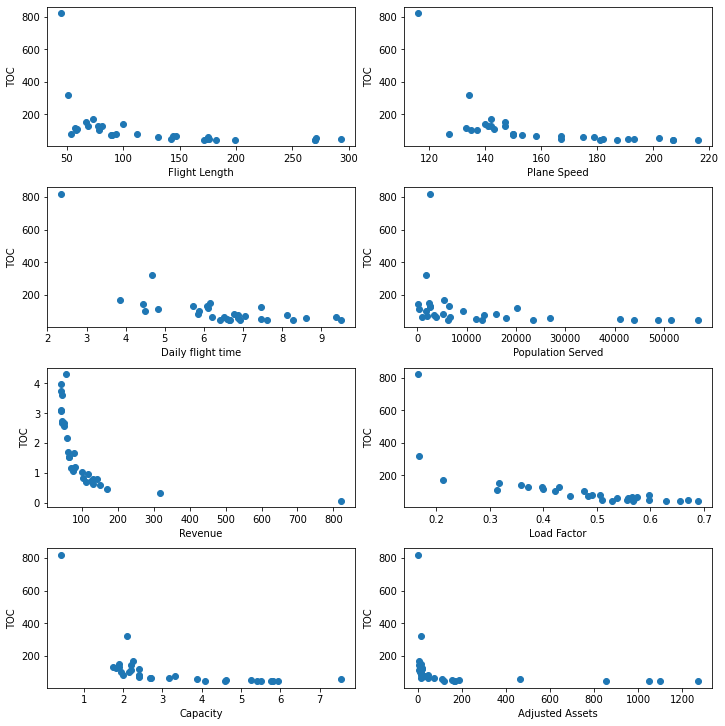

In [ ]:
#We will plot multiple scatter plots of TOC vs other attributes
fig = plt.figure(figsize=(10, 10)) 

fig.constrained_layout=True

ax11 = fig.add_subplot(421)
ax12 = fig.add_subplot(422)
ax21 = fig.add_subplot(423)
ax22 = fig.add_subplot(424)

ax31 = fig.add_subplot(425)
ax32 = fig.add_subplot(426)
ax41 = fig.add_subplot(427)
ax42 = fig.add_subplot(428)

ax11.scatter(airline_costs_data['Flight Length'],airline_costs_data['TOC'])
#ax11.set_title('TOC vs Flight Length')
ax11.set_xlabel('Flight Length')
ax11.set_ylabel('TOC')


ax12.scatter(airline_costs_data['Plane Speed'],airline_costs_data['TOC'])
#ax12.set_title('TOC vs Plane Speed')
ax12.set_xlabel('Plane Speed')
ax12.set_ylabel('TOC')

ax21.scatter(airline_costs_data['Daily flight time per plane'],airline_costs_data['TOC'])
#ax13.set_title('TOC vs Daily flight time')
ax21.set_xlabel('Daily flight time')
ax21.set_ylabel('TOC')

ax22.scatter(airline_costs_data['Population Served'],airline_costs_data['TOC'])
#ax14.set_title('TOC vs Population Served')
ax22.set_xlabel('Population Served')
ax22.set_ylabel('TOC')

ax31.scatter(airline_costs_data['TOC'],airline_costs_data['Revenue'])
#ax21.set_title('TOC vs Revenue')
ax31.set_xlabel('Revenue')
ax31.set_ylabel('TOC')

ax32.scatter(airline_costs_data['Load Factor'],airline_costs_data['TOC'])
#ax22.set_title('TOC vs Load Factor')
ax32.set_xlabel('Load Factor')
ax32.set_ylabel('TOC')

ax41.scatter(airline_costs_data['Capacity'],airline_costs_data['TOC'])
#ax23.set_title('TOC vs Capacity')
ax41.set_xlabel('Capacity')
ax41.set_ylabel('TOC')

ax42.scatter(airline_costs_data['Adjusted Assets'],airline_costs_data['TOC'])
#ax24.set_title('TOC vs Adjusted Assets')
ax42.set_xlabel('Adjusted Assets')
ax42.set_ylabel('TOC')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

We see that there is a negative trend in most of the plots.

$\large{\text{Another Question:}}$ What do we mean by a linear (or) linear looking trend between the response variable and the predictor variable when the predictor variable is high dimensional?

In the next figure, we shall illustrate the linear relationship between the response variavle $y$ and the predictor variable denoted by $\mathbf{x}=(x_1,x_2)$ which is two-dimensional, using a plane in 3d space. 

$\large{\text{Linear relationship between }} \mathbf{x} \text{ and } y \text{ captured by a plane}$.

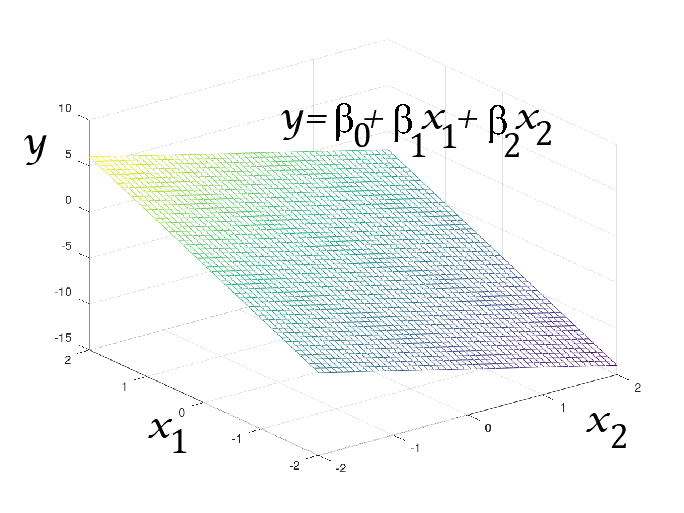

In [ ]:
from urllib.request import urlopen
from PIL import Image

img = Image.open(urlopen('https://raw.githubusercontent.com/balamurugan-palaniappan-CEP/AIML_CEP_2021/main/images/plane_pic.png'))
img

Hence when we look for $\large{\text{linear trend}}$ (or) $\large{\text{linear relationship}}$ when the predictor variable $\mathbf{x}$ is high dimensional, we look for the relationship to be approximated by a plane (or hyperplane). 

$\Large{\text{Probabilistic interpretation}}$ 

In probability terms, let us assume that $Y \in {\mathbb{R}}$ denotes the response random variable and $X \in {\mathbb{R}}^d$ denotes the predictor random variable in $d$ dimensions. 

Then we assume that the expected value of $Y$ given some observation of $X=(x_1,x_2,\ldots,x_d)$ is represented as: 

$
E[Y|X=(x_1,x_2,\ldots,x_d)] =  \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_d x_d.
$.

This can be equivalenty represented as:

$
E[Y|X=(x_1,x_2,\ldots,x_d)] =  \beta_0  + \sum_{j=1}^{d} \beta_j x_j.
$.

However when we observe a data point $({\mathbf{x}}^i, y^i)$ as a realization of the pair $(X,Y)$, where $\mathbf{x}^i=(x^i_1,x^i_2,\ldots,x^i_d)$, it is possible that the observed value $y^i$ of the response random variable $Y$ is not necessarily equal to the expected value $E[Y|X=\mathbf{x}^i]= \beta_0 + \sum_{j=1}^{d} \beta_j x^i_j$. 

In such case, we assume that the discrepancy between the observed value $y^i$ and the expected value $E[Y|X=\mathbf{x}^i]$ is captured by an error $e^i$ given by:

$
\begin{align}
e^i &= y^i - E[Y|X=\mathbf{x}^i] \\
\implies e^i&= y^i - (\beta_0 + \sum_{j=1}^{d} \beta_j x^i_j). 
\end{align}
$ 



Now we can assume that the data set $D$ comprises multiple realizations of the random variable pair $(X,Y)$. 

Thus when we the data set $D$ contains $n$ observations of the form $\{(\mathbf{x}^1,y^1), (\mathbf{x}^2,y^2), \ldots, (\mathbf{x}^n,y^n)\}$, then we can compute the errors as:
$\begin{align}
e^i = y^i - (\beta_0 + \sum_{j=1}^{d} \beta_j x^i_j), \forall i \in \{1,2,\ldots,n\}.
\end{align}
$

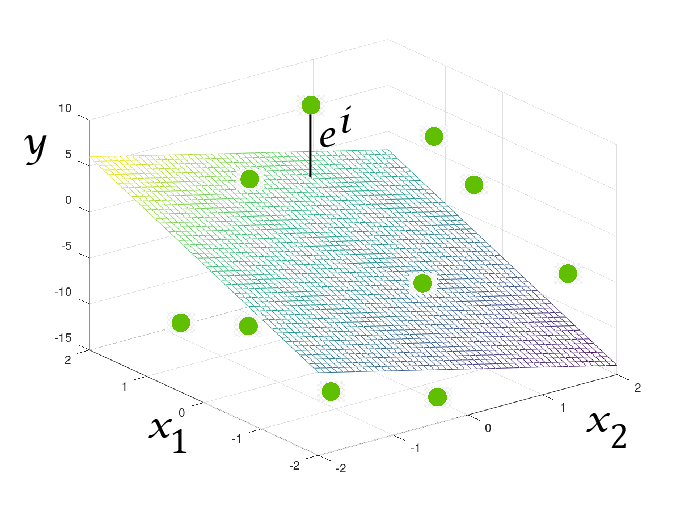

In [ ]:
img_points_errors = Image.open(urlopen('https://raw.githubusercontent.com/balamurugan-palaniappan-CEP/AIML_CEP_2021/main/images/plane_pic_with_points_errors.png'))
img_points_errors

$\large{\text{How to estimate the parameters } \beta_j, j=0,1,\ldots,d?}$ 

One way to estimate the values of $\beta_j, j=0,1,\ldots,d$ is by minimizing the sum of squared errors given by: 
$
\begin{align}
\min \sum_{i=1}^{n} (e^i)^2 
\end{align}
$
which can be equivalently written as the following optimization problem:
$
\begin{align}
\min_{\beta_0,\beta_1,\ldots,\beta_d} \sum_{i=1}^{n} [y^i - ( \beta_0 + \sum_{j=1}^{d} \beta_j x_j^i) ]^2. 
\end{align}
$

$\textbf{Note}$ that in the high dimensional case as well, the optimization problem is called the ordinary least squares (OLS) problem, and the term $\sum_{i=1}^{n} [y^i - ( \beta_0 + \sum_{j=1}^{d} \beta_j x_j^i) ]^2$ is called the OLS objective function and we will denote the OLS objective by:

$
\begin{align}
L(\beta_0, \beta_1,\ldots,\beta_d) = \sum_{i=1}^{n} [y^i - ( \beta_0 + \sum_{j=1}^{d} \beta_j x_j^i) ]^2. 
\end{align}
$ 

$\Large{\text{Solving the OLS optimization problem}}:$

Assuming the responses $y^1,y^2,\ldots,y^n$ are present in a $n \times 1$ matrix represented as:

$
\mathbf{y}=\begin{bmatrix}
y^1 \\ y^2 \\ \vdots \\ y^n
\end{bmatrix}
$

and the predictor variables $\mathbf{x}^1,\mathbf{x}^2,\ldots,\mathbf{x}^d$ are placed in a $n\times (d+1)$ matrix represented as:

$
\mathbf{X}=\begin{bmatrix}
\leftarrow & \mathbf{x}^1 & \rightarrow & 1 \\
\leftarrow & \mathbf{x}^2 & \rightarrow & 1 \\
\leftarrow & \ldots & \rightarrow & 1  \\
\leftarrow & \mathbf{x}^n & \rightarrow & 1 \\
\end{bmatrix}
=
\begin{bmatrix}
{x}_1^1 & {x}_2^1 &\ldots & {x}_d^1 & 1 \\
{x}_1^2 & {x}_2^2 &\ldots & {x}_d^2 & 1 \\
\vdots & \vdots & \ldots & \vdots \\
{x}_1^n & {x}_2^n &\ldots & {x}_d^n & 1 
\end{bmatrix}
$
where note that the last column of matrix $\mathbf{X}$ contains a column of all ones. This column is useful to incorporate the effect of $\beta_0$ parameter in $\mathbf{X}$ matrix. 

Similarly assume that 
 we can write the coefficients $\beta_0,\beta_1,\ldots,\beta_d$ as a $(d+1)\times 1$ matrix represented as:

$
\mathbf{\beta} = \begin{bmatrix}
\beta_1 \\ \beta_2 \\ \vdots \\ \beta_d \\ \beta_0
\end{bmatrix}.
$

Now we can write the objective function as:

$
L(\beta) = \|\mathbf{y} - \mathbf{X}\mathbf{\beta} \|_F^2.
$

To solve 

$
\min_\beta L(\beta) = \|\mathbf{y} - \mathbf{X}\mathbf{\beta} \|_F^2, 
$
we find the gradient with respect to $\beta$ and equate to zero. 

Thus we get:

$
\begin{align}
\nabla_\beta L(\beta) &= \mathbf{0} \\ 
\implies -\mathbf{X}^\top \mathbf{y} + \mathbf{X}^\top\mathbf{X} \beta &= \mathbf{0} \\ 
\implies \beta &= (\mathbf{X}^\top\mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}. 
\end{align}
$

Note that the closed form expression for $\beta$ is valid only when $(\mathbf{X}^\top\mathbf{X})^{-1}$ is invertible. Otherwise we need to solve the system given by:

$
\mathbf{X}^\top\mathbf{X} \beta = \mathbf{X}^\top \mathbf{y}
$
using a solver. 



$\Large{\text{Computing } \beta \text{ for the airline costs data set}}:$

In [ ]:
#Let us now compute beta 
n = len(airline_costs_data.index) #number of data points in the data set
print('number of data points in the data set:',n)

number of data points in the data set: 31


In [ ]:
#extract the predictor variable columns 
cols = [2,3,4,5,6,7,8,9]
X_data = airline_costs_data[airline_costs_data.columns[cols]]

X_data

,Flight Length,Plane Speed,Daily flight time per plane,Population Served,Revenue,Load Factor,Capacity,Adjusted Assets
0,57,133,6.10,20200,0.96,0.400,2.400,17.92
1,270,216,6.93,56928,3.98,0.689,5.776,1271.31
2,100,140,4.45,183,0.79,0.358,2.207,6.64
3,176,182,6.60,11869,2.57,0.557,4.614,154.49
4,142,167,7.47,41097,2.68,0.510,5.255,188.96
5,51,134,4.67,1757,0.35,0.167,2.096,14.01
6,175,175,8.60,18000,2.17,0.558,3.889,111.05
7,112,150,6.87,13500,1.68,0.505,3.327,34.55
8,131,179,6.50,3831,1.70,0.537,3.166,46.25
9,174,191,7.60,13119,2.74,0.598,4.582,170.45


In [ ]:
#convert predictor variable columns into a numpy array

X_array = airline_costs_data[airline_costs_data.columns[cols]].to_numpy()
X_array

array([[5.70000e+01, 1.33000e+02, 6.10000e+00, 2.02000e+04, 9.60000e-01,
        4.00000e-01, 2.40000e+00, 1.79200e+01],
       [2.70000e+02, 2.16000e+02, 6.93000e+00, 5.69280e+04, 3.98000e+00,
        6.89000e-01, 5.77600e+00, 1.27131e+03],
       [1.00000e+02, 1.40000e+02, 4.45000e+00, 1.83000e+02, 7.90000e-01,
        3.58000e-01, 2.20700e+00, 6.64000e+00],
       [1.76000e+02, 1.82000e+02, 6.60000e+00, 1.18690e+04, 2.57000e+00,
        5.57000e-01, 4.61400e+00, 1.54490e+02],
       [1.42000e+02, 1.67000e+02, 7.47000e+00, 4.10970e+04, 2.68000e+00,
        5.10000e-01, 5.25500e+00, 1.88960e+02],
       [5.10000e+01, 1.34000e+02, 4.67000e+00, 1.75700e+03, 3.50000e-01,
        1.67000e-01, 2.09600e+00, 1.40100e+01],
       [1.75000e+02, 1.75000e+02, 8.60000e+00, 1.80000e+04, 2.17000e+00,
        5.58000e-01, 3.88900e+00, 1.11050e+02],
       [1.12000e+02, 1.50000e+02, 6.87000e+00, 1.35000e+04, 1.68000e+00,
        5.05000e-01, 3.32700e+00, 3.45500e+01],
       [1.31000e+02, 1.79000e+02

In [ ]:
import numpy as np
#add a column of ones to X_array
X = np.hstack((X_array, np.ones((X_array.shape[0], 1), dtype=X_array.dtype)))

X

array([[5.70000e+01, 1.33000e+02, 6.10000e+00, 2.02000e+04, 9.60000e-01,
        4.00000e-01, 2.40000e+00, 1.79200e+01, 1.00000e+00],
       [2.70000e+02, 2.16000e+02, 6.93000e+00, 5.69280e+04, 3.98000e+00,
        6.89000e-01, 5.77600e+00, 1.27131e+03, 1.00000e+00],
       [1.00000e+02, 1.40000e+02, 4.45000e+00, 1.83000e+02, 7.90000e-01,
        3.58000e-01, 2.20700e+00, 6.64000e+00, 1.00000e+00],
       [1.76000e+02, 1.82000e+02, 6.60000e+00, 1.18690e+04, 2.57000e+00,
        5.57000e-01, 4.61400e+00, 1.54490e+02, 1.00000e+00],
       [1.42000e+02, 1.67000e+02, 7.47000e+00, 4.10970e+04, 2.68000e+00,
        5.10000e-01, 5.25500e+00, 1.88960e+02, 1.00000e+00],
       [5.10000e+01, 1.34000e+02, 4.67000e+00, 1.75700e+03, 3.50000e-01,
        1.67000e-01, 2.09600e+00, 1.40100e+01, 1.00000e+00],
       [1.75000e+02, 1.75000e+02, 8.60000e+00, 1.80000e+04, 2.17000e+00,
        5.58000e-01, 3.88900e+00, 1.11050e+02, 1.00000e+00],
       [1.12000e+02, 1.50000e+02, 6.87000e+00, 1.35000e+04, 1.

In [ ]:
#convert predictor variable columns into a numpy array

response_cols = [1]
y = airline_costs_data[airline_costs_data.columns[response_cols]].to_numpy()
y


array([[116.3],
       [ 43. ],
       [141.5],
       [ 50.6],
       [ 51. ],
       [318.5],
       [ 59.2],
       [ 77. ],
       [ 62.3],
       [ 45.3],
       [ 42.6],
       [112.4],
       [125.2],
       [169.3],
       [ 64.8],
       [100.5],
       [ 42.9],
       [ 81.1],
       [ 56.7],
       [ 75.4],
       [ 71.3],
       [150.1],
       [ 78.9],
       [130.3],
       [ 46.2],
       [ 42.3],
       [103.3],
       [ 44.2],
       [ 64.7],
       [820.9],
       [130.9]])

In [ ]:
#Now we are ready for finding beta
#print('X shape:',X.shape,'y shape:',y.shape)

XTX = np.matmul(np.transpose(X),X)
#print('XTX shape:',XTX.shape)

Xy = np.matmul(np.transpose(X),y)
#print('Xy shape:',Xy.shape)

beta = np.matmul(np.linalg.inv(XTX),Xy)

print('beta',beta)

beta [[ 6.64923065e-02]
 [-1.81342350e+00]
 [ 1.35069567e+01]
 [ 2.50178284e-03]
 [ 7.22550880e+02]
 [-2.19188200e+03]
 [-3.79344260e+02]
 [-2.44534555e-01]
 [ 1.36822689e+03]]


$\Large{\text{Residual Plot}}$

Sometimes it would be useful to plot the error (or) $\textbf{residual}$ $e^i$ versus the fitted values $\hat{y}^i=\beta_0 + \sum_{j=1}^{d} \beta_j x^i_j$.  

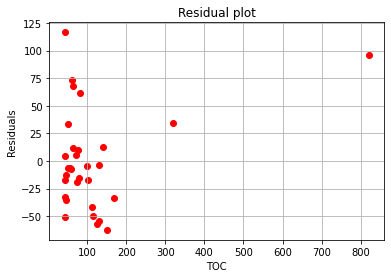

In [ ]:
e_i_residuals_list = [] 
for i in range(n): 
  x_i = X[i,:] #access i-th row of X
  y_i = y[i] #access i-th row of y

  y_pred_i = np.dot(x_i,beta) #compute the prediction obtained using the regression coefficients 
  e_i = y_i - y_pred_i #compute the difference between the actual observation y_i and prediction y_pred_i

  e_i_residuals_list.append(e_i) #append the value of e_i to the list 

#plot the residuals e_i against the actual observations y_i
plt.scatter(airline_costs_data['TOC'], e_i_residuals_list,color='r')
plt.title("Residual plot")
plt.xlabel("TOC")
plt.ylabel("Residuals")
plt.grid()
plt.show()

Note that the residual plot helps to check the variance in the errors $e^i$. 

$\Large{\text{Coefficient of multiple determination for high dimensions}}$ 

Note that the description of coefficient of multiple determination for high dimensions is essentially the same as that for single dimension case. 

Consider the term 

$
\begin{align}
\Sigma_{YY} = \sum_{i=1}^{n} (y^i - \bar{y})^2. 
\end{align}
$
This term $\Sigma_{YY}$ measures the $\textbf{observed total variation of the response}$, without considering the effect of predictor variables. 

When we have access to a predictor variable, then the $\textbf{unexplained variation of response variable given the predictor variable}$ is given by the sum of squared residuals:

$
\begin{align}
L = \sum_{i=1}^{n} (e^i)^2. 
\end{align}
$

Define the term:

$
\begin{align}
\text{SSD} = \Sigma_{YY}- L
\end{align}
$

as the difference between observed total variation of the response and the unexplained variation given the predictor. Hence this can be considered as $\textbf{variability explained by the regression on the predictor variable}$. 

Assuming $\Sigma_{YY}\neq 0$, consider: 

$
\begin{align}
\frac{\text{SSD}}{\Sigma_{YY}} = 1- \frac{L}{\Sigma_{YY}}.
\end{align}
$
Here the term $\frac{\text{SSD}}{\Sigma_{YY}}$ denotes the proportion of observed variability in the response variable which is explained by the regression on the predictor variable. From the equality, this proportion of observed variability given the predictor is simply $1$ minus the proportion of unexplained variability. 

This term $\frac{\text{SSD}}{\Sigma_{YY}}$ denoting the proportion of observed variability which is explained by the predictor variable has a special name called $\textbf{coefficient of multiple determination}$ and is denoted by $R^2$. 

It is known that $0\leq R^2 \leq 1$. 

Let us compute $R^2$. 

In [ ]:
#We shall now compute R^2 for airline costs data

#first we shall compute y_bar 
y_bar = 0
for i in range(n): #access each row from the data set 
  y_i = float(airline_costs_data.iat[i,1]) #access element at TOC column
  y_bar += y_i

y_bar /= n
print('y_bar',y_bar)

#Next we shall compute sigma_yy, which is the variance of y 
sigma_yy = 0
for i in range(n): #access each row from the data set 
  y_i = float(airline_costs_data.iat[i,1]) #access element at TOC column
  sigma_yy += (y_i-y_bar)**2

print('sigma_yy:', sigma_yy)

#now we can compute sum of squared residuals 
sum_sq_residuals = 0
for i in range(n): #access each row from the data set 
  x_i = X[i,:] #access i-th row of X
  y_i = y[i] #access i-th row of y

  y_pred_i = np.dot(x_i,beta) #compute the prediction obtained using the regression coefficients 
  e_i = y_i - y_pred_i #compute the difference between the actual observation y_i and prediction y_pred_i

  sum_sq_residuals += (e_i)**2

print('sum of squared residuals:', sum_sq_residuals)

#Then we will compute the R^2 quantity
R_sq = 1-sum_sq_residuals/sigma_yy
print('R^2:',R_sq)

y_bar 113.50645161290323
sigma_yy: 610938.3987096774
sum of squared residuals: [61207.50152302]
R^2: [0.89981396]


$\Large{\text{Exercise:}}$

Perform high dimensional linear regression with the following data sets:
1. Data: http://users.stat.ufl.edu/~winner/data/bridge_risk.txt
   Description: http://users.stat.ufl.edu/~winner/data/bridge_risk.txt
2. Data: http://users.stat.ufl.edu/~winner/data/lpga2009.dat
   Description: http://users.stat.ufl.edu/~winner/data/lpga2009.txt
Report the residual plots and $R^2$ value for each data set. Explain your observations. 


$\Large{\text{References:}}$



1.   Olive J. David, $\textit{Linear Regression}$. Springer International Publishing,  2017.
2.   Sanford Weisberg. $\textit{Applied Linear Regression}$. John Wiley $\&$ Sons, Inc., Hoboken, New Jersey, 4-th Edition, 2014.

